# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CS506-Boston-University/homework1-marknam1999/main/train.csv'
df = pd.read_csv(url)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [ ]:
def num_nans(df):
  count = 0
  for i, row in df.iterrows():
    for j in range(len(row)):
      value = row[j]
      if pd.isnull(value):
        count +=1
  return count

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 866 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [ ]:
def drop_na(df):
  for Name in df.columns:
    threshhold = df[Name].isnull().sum()
    if threshhold > 200:
      del df[Name]    
  return df
   
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [ ]:
def to_numerical(df):
  df.loc[df["Sex"] == "male", "Sex"] = 0
  df.loc[df["Sex"] == "female", "Sex"] = 1
  return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [ ]:
def extract_names(df):
  lstFirst = []
  lstMiddle = []
  lstLast = []
  lstTitle = []
  for i in range(len(df)):
    Names = df['Name'].values[i].split(" ")
    if len(Names) == 4:
      # appending last name to the list without the comma
      lastName = Names[0]
      lstLast.append(lastName[:-1])

      # appending title to the list without the period
      title = Names[1]
      lstTitle.append(title[:-1])

      # appending first name to the list
      lstFirst.append(Names[2])

      # appending middle name to the list
      lstMiddle.append(Names[3])

    elif len(Names) == 3: 
      # appending last name to the list without the comma
      lastName = Names[0]
      lstLast.append(lastName[:-1])

      # appending title to the list without the period
      title = Names[1]
      lstTitle.append(title[:-1])

      # appending first name to the list
      lstFirst.append(Names[2])

      # append an empty string to the middle name list since they dont have one
      lstMiddle.append("")
    
    elif len(Names) > 4:
      # appending last name to the list without the comma
      lastName = Names[0]
      lstLast.append(lastName[:-1])

      # appending title to the list without the period
      title = Names[1]
      lstTitle.append(title[:-1])

      # appending first name to the list
      lstFirst.append(Names[2])

      # append the rest to the middle name list
      middleName = ""
      for i in range(3, len(Names)):
        middleName += Names[i] + " "
      lstMiddle.append(middleName)

  df['First Name'] = lstFirst
  df['Middle Name'] = lstMiddle
  df['Last Name'] = lstLast
  df['Title'] = lstTitle
  return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [ ]:
def replace_with_mean(df):
    average = df['Age'].mean()
    df['Age'] = df['Age'].fillna(average)
    print(average)
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head()

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

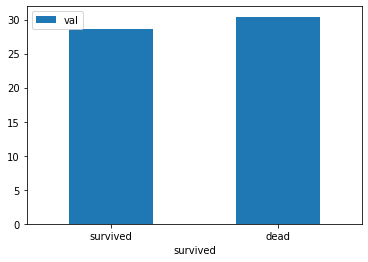

In [ ]:
# your code here
def plot_avgAge(df):
  survived = df['Survived'] == 1
  mean_survived = df.loc[survived, 'Age'].mean()
  
  dead = df['Survived'] == 0
  mean_dead = df.loc[dead, 'Age'].mean()
  return mean_survived, mean_dead

mean_survived, mean_dead = plot_avgAge(df)
survived_age = pd.DataFrame({"survived":["survived", "dead"], "val":[mean_survived, mean_dead]})
plot = survived_age.plot.bar(x = "survived", y = "val", rot = 0)

Mean age for the dead is higher than survived. This could possibly be because the older people were weaker to handle the stress or because they have to take care of the younger people

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

0


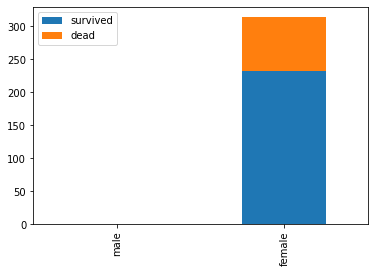

In [ ]:
# your code here
def plot_sexRatio(df):
  male_dead_count = df.loc[(df['Survived'] == 0) & (df['Sex'] == 0), 'Sex'].sum()
  print(male_dead_count)
  male_survived_count = df.loc[(df['Survived'] == 1) & (df['Sex'] == 0), 'Sex'].sum()
  female_survived_count = df.loc[(df['Survived'] == 1) & (df['Sex'] == 1), 'Sex'].sum()
  female_dead_count = df.loc[(df['Survived'] == 0) & (df['Sex'] == 1), 'Sex'].sum()

  return (male_survived_count, male_dead_count, female_survived_count, female_dead_count)


    
m_survived, m_dead, f_survived, f_dead = plot_sexRatio(df)
survived_proportion = [m_survived, f_survived]
dead_proportion = [m_dead, f_dead]
index = ["male", "female"]
sex_survival_proportion_df = pd.DataFrame({"survived": survived_proportion, "dead": dead_proportion}, index = index)
sex_survival_proportion_plot = sex_survival_proportion_df.plot.bar(stacked = True)

-> For some reason, I could not get the male part to work but it seems like female survival rate is much higher than dead, probably resulting in them being escorted out first.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

In [ ]:
# your code here

-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [ ]:
# your code here

-> your answer here

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [ ]:
# your code here

-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
# your code here
df.head()

l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
df = # < your code here >

m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [ ]:
def N_most_similar(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [ ]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response
lstTopics = ["Python", "Data Science", "Data Analysis", "Machine Learning", "Deep Learning"]
python = get(lstTopics[0])
data_science = get(lstTopics[1])
data_analytics = get(lstTopics[2])
machine_learning = get(lstTopics[3])
deep_learning = get(lstTopics[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [ ]:
# your code here
#convert to a df
py_df = pd.json_normalize(python['items'])
ds_df = pd.json_normalize(data_science['items'])
da_df = pd.json_normalize(data_analytics['items'])
ml_df = pd.json_normalize(machine_learning['items'])
dl_df = pd.json_normalize(deep_learning['items'])

#save as csv
py_df.to_csv('python.csv')
ds_df.to_csv('data_science.csv')
da_df.to_csv('data_analytics.csv')
ml_df.to_csv('machine_learning.csv')
dl_df.to_csv('deep_learning.csv')


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [ ]:
# your code here
py_df.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
ds_df.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
da_df.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
ml_df.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
dl_df.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [ ]:
# your code here
py_df["Topic"] = "Python"
ds_df["Topic"] = "Data Science"
da_df["Topic"] = "Data Analytics"
ml_df["Topic"] = "Machine Learning"
dl_df["Topic"] = "Deep Learning"
all_df = pd.concat([py_df, ds_df, da_df, ml_df, dl_df])

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [ ]:
# your code here
def title_date(df):
  df = df[df['Title'].str.contains('Data')]
  return df


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [ ]:
# your code here
def authors(df):
    listAuthors = []
    for i, row in df.iterrows():
        lstName = row.values[6][0].split(" ")
        # print(lstName)
        firstName = lstName[0]
        lastName = lstName[-1]
        if firstName[0] == "E":
          listAuthors.append(row)
        elif lastName[0] == "E":
          listAuthors.append(row)
    return listAuthors
    
print(authors(all_df))

[kind                                                                                        books#volume
id                                                                                          xDszEAAAQBAJ
etag                                                                                         rs3LtOA8Wlo
selfLink                                               https://www.googleapis.com/books/v1/volumes/xD...
Title                                                                     Build a Career in Data Science
volumeInfo.subtitle                                                                                  NaN
Authors                                                               [Emily Robinson, Jacqueline Nolis]
volumeInfo.publishedDate                                                                      2020-03-06
volumeInfo.description                                 Summary You are going to need more than techni...
volumeInfo.industryIdentifiers                        